# Machine Learning Project - Wine Classification


## 1. Introduction

En este proyecto aplicamos técnicas de aprendizaje supervisado para clasificar vinos en tres categorías en función de sus características químicas.

El objetivo es construir un modelo de clasificación multiclase capaz de predecir correctamente la clase del vino.



## 2. Dataset Overview

En esta sección cargamos el dataset y verificamos su estructura general antes de comenzar la preparación de datos.

In [2]:
# --- Librerías base ---
import numpy as np
import pandas as pd

# --- Visualización ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Scikit-Learn ---
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df_wines = pd.read_csv("../data/wine.data", header=None)


df_wines.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#Asignamos nombres a las columnas

columns = [
    "class",
    "alcohol",
    "malic_acid",
    "ash",
    "alcalinity_of_ash",
    "magnesium",
    "total_phenols",
    "flavanoids",
    "nonflavanoid_phenols",
    "proanthocyanins",
    "color_intensity",
    "hue",
    "od280_od315",
    "proline"
]

df_wines.columns = columns

df_wines.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Convertimos clases 1,2,3 en 0,1,2
df_wines["class"] = df_wines["class"] - 1

# Comprobamos
df_wines["class"].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [5]:
X = df_wines.drop("class", axis=1)
y = df_wines["class"]

In [6]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity_of_ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total_phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  od280_od315           178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
df_wines.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,0.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,2.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,2.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 3. Data Preparation

### 3.1 Data Cleaning and Validation

Verificamos que el dataset no contenga valores nulos, duplicados ni inconsistencias en los tipos de datos.

In [8]:
df_wines.isnull().sum()

class                   0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280_od315             0
proline                 0
dtype: int64

In [9]:
df_wines.duplicated().sum()

np.int64(0)

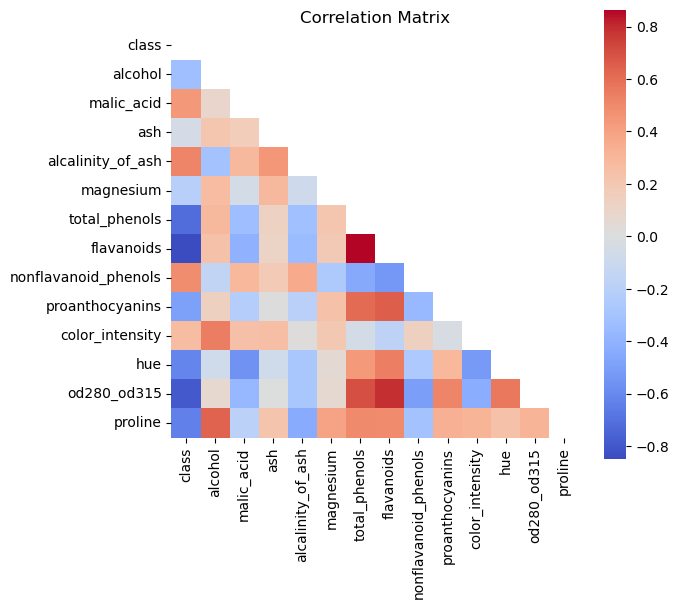

In [32]:
#Verificamos la correlación entre las características utilizando un mapa de calor (heatmap) para identificar posibles relaciones entre ellas.
corr = df_wines.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(7,7))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### 3.2 Exploratory PCA Analysis


En esta sección aplicamos Análisis de Componentes Principales (PCA) con fines exploratorios.
El objetivo es visualizar la separabilidad entre clases en un espacio reducido a dos dimensiones.
Este análisis no se utiliza para entrenar el modelo final.

La proyección en dos componentes principales muestra una separación clara entre las tres clases.
La primera componente captura la mayor parte de la varianza y permite distinguir especialmente la clase 0 del resto.
Esto sugiere que las variables químicas contienen suficiente información estructural para una clasificación efectiva.

In [11]:
scaler_full = StandardScaler()
X_scaled_full = scaler_full.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_full)


In [12]:
print("Varianza explicada por componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", sum(pca.explained_variance_ratio_))

Varianza explicada por componente: [0.36198848 0.1920749 ]
Varianza total explicada: 0.5540633835693527


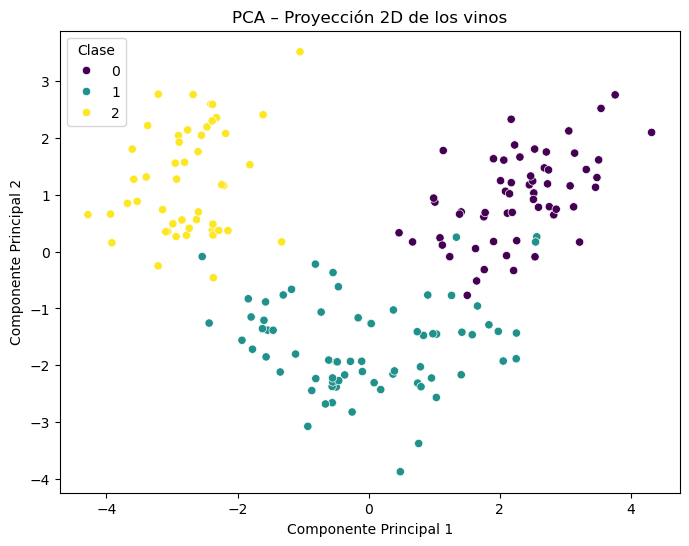

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=y,
    palette="viridis"
)

plt.title("PCA – Proyección 2D de los vinos")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clase")
plt.show()

### 3.3 Train-Test Split

Dividimos el dataset en conjunto de train y test utilizando una división estratificada para mantener la proporción de clases.

In [14]:
#Dividimos el dataset en entrenamiento (80%) y test (20%), utilizando stratify=y para mantener la proporción de clases en ambos subconjuntos. Esto evita sesgos derivados de un desbalance en la variable objetivo.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

## 4. Baseline Model (KNN)
Aplicamos estandarización a las variables predictoras utilizando StandardScaler.

El ajuste del scaler se realiza únicamente sobre el conjunto de entrenamiento para evitar data leakage.

In [15]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
#Entrenamos un modelo KNN con 5 vecinos como punto de partida. Este modelo clasifica cada observación en función de las clases más cercanas en el espacio de características.
knn_wines = KNeighborsClassifier(n_neighbors=5)

knn_wines.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
#Predicciones de Y
y_pred = knn_wines.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.9722222222222222

Matriz de confusión:
 [[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



El modelo KNN alcanza una accuracy del 97%, con una matriz de confusión que muestra una clara separación entre clases. La mayoría de los errores se concentran entre las clases 1 y 2, lo que sugiere similitudes estructurales en ciertas características químicas.

## 5. Baseline Model & Hyperparameter Exploration

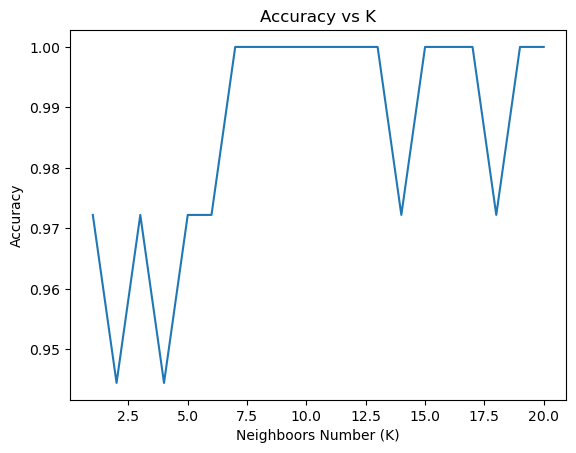

In [19]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies)
plt.xlabel("Neighboors Number (K)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

In [20]:
#Analizamos el impacto del hiperparámetro K en el rendimiento del modelo. Observamos que el accuracy se estabiliza a partir de K≈7, alcanzando incluso el 100% en el conjunto de test. Esto indica que el dataset presenta una estructura claramente separable.

In [21]:
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"Mejor K encontrado: {best_k}")
print(f"Accuracy correspondiente: {best_accuracy:.4f}")

Mejor K encontrado: 7
Accuracy correspondiente: 1.0000


In [22]:
knn_final = KNeighborsClassifier(n_neighbors=7)
knn_final.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [23]:
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.9578817733990148


Al evaluar distintos valores de K entre 1 y 20, observamos que el rendimiento se estabiliza a partir de K≈7, alcanzando una accuracy del 100% en el conjunto de test. Esto sugiere que el dataset presenta una separación muy clara entre clases.
Dado que el dataset es pequeño y bien estructurado, no es extraño obtener resultados perfectos con modelos basados en distancia.

## 6. Model Comparison

In [24]:
#Definimos los modelos a evaluar
models = {
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [25]:
results = []

for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    test_acc = model.score(X_test, y_test)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    results.append({
        "Model": name,
        "Test Accuracy": test_acc,
        "CV Mean Accuracy": cv_scores.mean()
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="CV Mean Accuracy", ascending=False)

,Model,Test Accuracy,CV Mean Accuracy
1,Logistic Regression,0.972222,0.985961
0,KNN (k=7),1.000000,0.957882
2,Decision Tree,0.944444,0.916256


In [26]:
results_df["Gap (Test - CV)"] = results_df["Test Accuracy"] - results_df["CV Mean Accuracy"]
results_df.sort_values(by="CV Mean Accuracy", ascending=False)

,Model,Test Accuracy,CV Mean Accuracy,Gap (Test - CV)
1,Logistic Regression,0.972222,0.985961,-0.013738
0,KNN (k=7),1.000000,0.957882,0.042118
2,Decision Tree,0.944444,0.916256,0.028188


Tras comparar KNN, Logistic Regression y Decision Tree, se observa que:

KNN alcanza el mayor accuracy en el conjunto de test (100%), pero presenta menor estabilidad en validación cruzada.

Decision Tree muestra un rendimiento inferior y mayor variabilidad.

Logistic Regression obtiene un rendimiento muy alto (97% en test) y la mejor media en validación cruzada (~98.6%), indicando mayor capacidad de generalización.

Por tanto, se selecciona Logistic Regression como modelo final, priorizando estabilidad y robustez sobre rendimiento puntual en un único split.

## 7. Final Model Selection

In [27]:
logistic_final = LogisticRegression(max_iter=1000)
logistic_final.fit(X_train, y_train)

y_pred_log = logistic_final.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_log))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_log))

Accuracy: 0.9722222222222222

Matriz de confusión:
 [[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [28]:
cv_scores = cross_val_score(logistic_final, X_train, y_train, cv=5)

print("Cross-validation mean accuracy:", cv_scores.mean())
print("Cross-validation std:", cv_scores.std())

Cross-validation mean accuracy: 0.9859605911330049
Cross-validation std: 0.01719910369467594


In [29]:
#Creación de un DataFrame para visualizar los coeficientes del modelo de regresión logística. Esto nos permite interpretar la importancia de cada característica en la clasificación de las clases de vino.
coef_df = pd.DataFrame(
    logistic_final.coef_,
    columns=X.columns
)

coef_df.index = ["Class 0", "Class 1", "Class 2"]
coef_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
Class 0,0.717483,0.167605,0.460126,-0.835063,0.038629,0.226480,0.705264,-0.108313,0.125404,0.220184,0.075344,0.700187,0.926539
Class 1,-0.861536,-0.512162,-0.807256,0.466246,-0.143768,0.062098,0.198202,0.110509,0.370369,-1.096016,0.630272,-0.131291,-1.009905
Class 2,0.144053,0.344557,0.347130,0.368817,0.105138,-0.288579,-0.903466,-0.002196,-0.495773,0.875831,-0.705615,-0.568896,0.083366


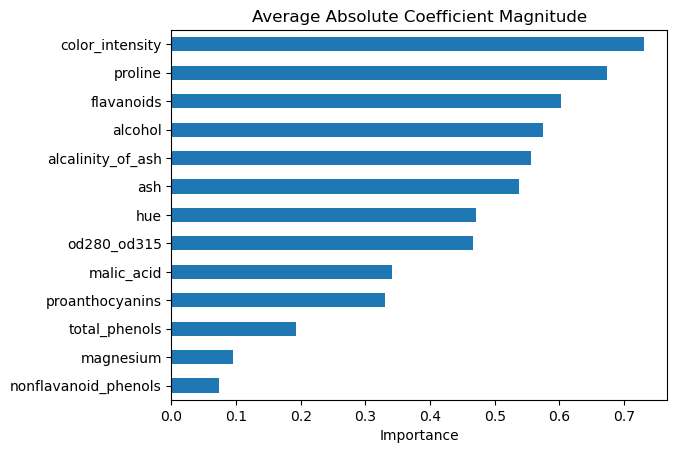

In [30]:
#Qué variables tienen mayor impacto en la clasificación? Para responder a esta pregunta, calculamos la importancia de cada característica tomando el valor absoluto de los coeficientes y promediándolos. Esto nos permite identificar cuáles son las variables más relevantes para el modelo de regresión logística.
coef_importance = coef_df.abs().mean().sort_values(ascending=False)
coef_importance.plot(kind="barh")
plt.title("Average Absolute Coefficient Magnitude")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

In [31]:
coef_importance.head(5)

color_intensity      0.730677
proline              0.673270
flavanoids           0.602310
alcohol              0.574358
alcalinity_of_ash    0.556709
dtype: float64

Las variables con mayor magnitud promedio de coeficientes en el modelo de Regresión Logística son similares a las mostradas en el modelo KNN (intensidad del color, prolinas, flavanoides, graduación alcohólica y alcalinidad, es decir, su contenido mineral).

Esto indica que estas características tienen mayor peso en la separación entre clases dentro del espacio lineal aprendido por el modelo.

Dado que las variables fueron previamente estandarizadas, la comparación de magnitudes es válida y permite interpretar su relevancia relativa.

Desde una perspectiva enológica, resulta interesante observar que variables asociadas al color y a los compuestos fenólicos (como flavonoides y proline) destacan como determinantes en la clasificación.

Esto sugiere que el modelo captura diferencias químicas estructurales que, en la práctica, también influyen en el perfil sensorial y la identidad del vino.